## Código para el Proyecto Final de la clase de Métodos Computacionales para las Políticas Públicas
**Sergio Daniel Sánchez Pulido** - sergiod.sanchez@urosario.edu.co - C.C 1010244478 - Noviembre 2021 

In [1]:
import time # así se importan las librerías
import pandas as pd # cambiar la forma de llamar la libreria para más comodidad. Hay convenciones pandas = pd
from selenium import webdriver # importo el driver donde se trabajará de forma automática

In [2]:
ruta_driver = r"C:\Users\Sergio Sánchez\OneDrive\Documentos\MAESTRÍA ECOPOL\Métodos Computacionales para las Políticas Públicas/chromedriver.exe" #Esta es la ruta del driver de mi computador personal, para cada persona es distinta la ubicación

In [3]:
driver = webdriver.Chrome(ruta_driver) #Abro el driver en una pestaña nueva

In [4]:
driver.get("https://www.redib.org/Search/Results?lookfor=innovation+management+colombia+") #Abro la página de la que voy a extraer los datos en el driver

In [5]:
patron_prim_part = "/html/body/div[4]/div/div[1]/form/div[" 
patron_segund_part = "]/div/div[1]/div[1]/a"
#Para hacer el scraping por xpath, y para abrir los links hay una tendencia de los xpaths en general, pero hace falta cambiarle un número

In [6]:
links_xpath = [] #conjunto vacío para agregar la tendencia final
for n in range(1,21): #el patrón para que no ocurran errores va del 1 hasta el 20, por eso hago un range del 1 al 21
    patron_final = patron_prim_part + str(n) + patron_segund_part
    #Sumo el primer patrón, con lo que se cambia en el range, en formato string, y el segundo patrón
    links_xpath.append(patron_final) 

In [7]:
titulo_dataset = []
#Creo un conjunto vacío para agregar el título conforme cambie el loop
titulo_journal = []
#Creo un conjunto vacío para agregar el titulo del journal conforme cambie el loop
abstract = []
#Creo un conjuunto vacío para agregar el abstract de cada dataset
source = []
#Creo un conjunto vacío para posteriormente con expresiones regulares, extraer el año
driver.get("https://www.redib.org/Search/Results?lookfor=innovation+management+colombia+")
#Abro el link donde están todos los dataset
for n in links_xpath:
    #Hago un loop para cambiar de dataset en dataset
    time.sleep(1)
    #Utilizo time para que se demore cierto tiempo en realizar la siguiente acción, no sepan que es una máquina
    driver.find_element_by_xpath(n).click()
    #Le doy click a n, que es la dirección de cada dataset que cambia conforme va cambiado el loop
    time.sleep(2)
    titulo = driver.find_element_by_xpath('//*[@id="record"]/div/div/div[1]/div[2]/h1').text
    #Encuentro el Xpath que pertenece al título y lo cojo en formato .text
    time.sleep(1)
    titulo_dataset.append(titulo)
    #Agrego a la lista que cree, cada uno de los títulos conforme cambie el loop
    time.sleep(1)
    title_journal = driver.find_element_by_xpath('//*[@id="record"]/div/div/div[1]/div[2]/p/a').text
    #Encuentro el Xpath que pertenece al título del journal y lo cojo en formato .text
    time.sleep(1)
    titulo_journal.append(title_journal)
    #Agrego a la lista que cree, cada uno de los títulos de los journal conforme cambie el loop
    time.sleep(1)
    resumen = driver.find_element_by_xpath('//*[@id="collapseExample"]').text
    #Encuentro el Xpath que pertenece al resumen y lo cojo en formato .text
    time.sleep(1)
    abstract.append(resumen)
    #Agrego a la lista que cree, cada uno de los resúmenes conforme cambie el loop
    time.sleep(1)
    referencia = driver.find_element_by_xpath('//*[@id="record"]/div/div/table/tbody/tr[10]/td').text
    #Agrego a la lista que cree, cada uno de las referencias conforme cambie el loop
    time.sleep(1)
    source.append(referencia)
    #Agrego a la lista que cree, cada uno de las referencias conforme cambie el loop
    driver.get("https://www.redib.org/Search/Results?lookfor=innovation+management+colombia+")
    #Me devuelvo a la página inicial porque sino lo  hago, se queda travado el código y sólo me arrojaría el resultado del primer link 

In [8]:
titulo_journal #Imprimo la lista para saber que haya recogido la información que le pedí

['Revista de Estudios Sociales',
 'Recerca. Revista de Pensament i Anàlisi',
 'Dimensión Empresarial',
 'Revista Estudos e Pesquisas em Administração',
 'Sofia - sophia',
 'Cuadernos de administración (Universidad del Valle)',
 'Neumann Business Review',
 'Teuken Bidikay, revista Latinoamericana de investigación en organizaciones ambiente y sociedad',
 'Neumann Business Review',
 'Revista U.D.C.A Actualidad & Divulgación Científica',
 'Desarrollo gerencial',
 'Social review',
 'Revista Facultad de Ciencias Económicas',
 'Navus: Revista de Gestão e Tecnologia',
 'MedUNAB',
 'Ingeniería, Investigación y Desarrollo',
 'Revista Universidad & Empresa',
 'Revista Científica',
 'Investigación & Desarrollo',
 'Desarrollo gerencial']

In [9]:
titulo_dataset #Imprimo la lista para saber que haya recogido la información que le pedí

['A Causal Mechanism of Policy Innovation: The Reform of Colombia’s Oil-Rents Management System',
 'Applying Strategic Niche Management to understand how universities contribute to the development of social innovation niches: the case of the Social Innovation Scientific Park in Colombia',
 'Services sector in Colombia: relationship between innovation and internationalization',
 'INNOVATION PROGRAMS MODELS: Design and management',
 'Education management: toward optimization of teacher training in higher education in Colombia',
 'The effect of human resource management practices and innovation: Colombian small and medium-sized enterprises',
 'The Innovation Strategy and Effects in Organizational Learning: The Manufacturing Sector in Colombia',
 'Estrategias de innovación en la gerencia del sector MiPyME de Santa Marta, Colombia',
 'Innovation strategy, quality and performance in the service sector',
 'Caracterización de la innovación en las pymes manufactureras en Colombia desde la persp

In [10]:
abstract #Imprimo la lista para saber que haya recogido la información que le pedí

['This article analyzes policy innovation in Colombia, through the adoption of a new centralized oil-rent management system in 2011, after 20 years of decentralized policies. Using a policy-design framework, we identify a causal mechanism linking the opening of a policy window to policy change as a combination of the emergence of a new policy network, the adoption of a new policy paradigm and the selection of a new instruments mix. Drawing on Bayesian statistics, the 11 tests conducted on the causal mechanism show the importance of State resources of information, authority, treasury and organization to assess the outcome of policy change.',
 'Little literature has looked at the role of universities promoting and supporting grassroots social innovations. This paper addresses this gap by examining how universities contribute to social innovation in Colombia. In seeking to develop a good understanding of how universities can contribute to the development of social innovation niches, we dr

In [11]:
source #Me doy cuenta que en lista de referencia, el xpath no funciona de forma correcta para todos los artículos, por lo que decido hacerlo de otra forma 

['Revista de Estudios Sociales; No 63 (Año 2018).',
 'Universitat Jaume I',
 'Universidad Autónoma del Caribe',
 'Ciencias Sociales y Humanidades --> Gestión\nCiencias Sociales y Humanidades --> Ciencias Sociales',
 'http://dx.doi.org/10.18634/sophiaj.12v.1i.445',
 'http://dx.doi.org/10.25100/cdea.v36i68.9811',
 'Reconocimiento - NoComercial - CompartirIgual (by-nc-sa)',
 'Teuken Bidikay, revista Latinoamericana de investigación en organizaciones ambiente y sociedad; Vol 10, No 14 (Año 2019).',
 'Reconocimiento - NoComercial - CompartirIgual (by-nc-sa)',
 'Revista U.D.C.A Actualidad & Divulgación Científica; Vol 18, No 2 (Año 2015).',
 'Desarrollo gerencial; Vol 10, No 2 (Año 2018).',
 'Social review; Vol 8, No 1 (Año 2019).',
 'Revista Facultad de Ciencias Económicas; Vol XXII, No 2 (Año 2014).',
 'Navus: Revista de Gestão e Tecnologia; Vol 6, No 4 (Año 2016).',
 'http://dx.doi.org/10.29375/01237047.2746',
 'Reconocimiento (by)',
 'Revista Universidad & Empresa; Vol 21, No 36 (Año 201

In [12]:
source = str(source)

In [13]:
import re #Importo la librería que corresponde a las expresiones regulares

In [14]:
p = re.compile(r"\s[\d]{4}") #Creo la expresión regular que corresponde a los años

In [15]:
años = p.findall(source) #Hago el correspondiente match en el str de source

In [16]:
años #Aquí me doy cuenta que no recoje todos los años que corresponden al número de artículos

[' 2018',
 ' 2019',
 ' 2015',
 ' 2018',
 ' 2019',
 ' 2014',
 ' 2016',
 ' 2019',
 ' 2016']

In [17]:
driver.get("https://www.redib.org/Search/Results?lookfor=innovation+management+colombia+")
años = driver.find_elements_by_xpath("//*[@id='blockInfoTitle']/div[2]") #Lo que hago es coger de la página principal todos los elementos que corresponden a este xpath que recoje el texto de los años

In [18]:
años # Me arroja los elementos en formalto selenium, debo convertirlos a texto

[<selenium.webdriver.remote.webelement.WebElement (session="2d1e7ec379adfe78de708f9a34bc4212", element="3bb8dde0-cace-4f08-9aac-6e215399a23e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2d1e7ec379adfe78de708f9a34bc4212", element="04ef5a10-52fe-4244-9e83-56b204823fba")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2d1e7ec379adfe78de708f9a34bc4212", element="0849608a-9805-4266-9c78-984f489e431c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2d1e7ec379adfe78de708f9a34bc4212", element="d6743143-cf45-426c-b794-72ae29028370")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2d1e7ec379adfe78de708f9a34bc4212", element="4f4c7b51-c535-4ea9-8bd0-3143fb2d46dc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2d1e7ec379adfe78de708f9a34bc4212", element="718a69fd-a362-477b-85bd-eb35b48a82ec")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2d1e7ec379adfe78de708f9a34bc4212", element="2601ea6d-8ff7-42b4-bc33-c7

In [19]:
Años_final = []
for año in años:
    Años_final.append(año.text) # Por nedio de este código paso los elementos selenium a formato de texto

In [20]:
Años_final = str(Años_final) #Realizo lo que hice arriba, cambiando el str al que le realizo el match con la expresión regular correspondiente

In [21]:
p = re.compile(r"[\d]{4}") 

In [22]:
year =p.findall(Años_final)

In [23]:
len(year) #Compruebo que se  hayan recogido los años necesarios

20

In [24]:
Redib = {"Título Artículo": titulo_dataset, "Nombre Revista Científica": titulo_journal, "Resumen": abstract, "Año": year} #Creo un diccionario con toda la información que he recogido de cada uno de los artículos

In [25]:
Redib_frame = pd.DataFrame(Redib) #Creo un dataframe para organizar la información en un dataset

In [26]:
Redib_frame #Imprimo el dataset para comprobarlo

,Título Artículo,Nombre Revista Científica,Resumen,Año
0,A Causal Mechanism of Policy Innovation: The R...,Revista de Estudios Sociales,This article analyzes policy innovation in Col...,2018
1,Applying Strategic Niche Management to underst...,Recerca. Revista de Pensament i Anàlisi,Little literature has looked at the role of un...,2018
2,Services sector in Colombia: relationship betw...,Dimensión Empresarial,The services sector has been constituted as th...,2017
3,INNOVATION PROGRAMS MODELS: Design and management,Revista Estudos e Pesquisas em Administração,"Projetos de inovação podem desenhar, desenvolv...",2019
4,Education management: toward optimization of t...,Sofia - sophia,The purpose of this reflection article is to a...,2016
5,The effect of human resource management practi...,Cuadernos de administración (Universidad del V...,The need for small and medium-sized enterprise...,2020
6,The Innovation Strategy and Effects in Organiz...,Neumann Business Review,Purpose To understand how innovation strategy ...,2018
7,Estrategias de innovación en la gerencia del s...,"Teuken Bidikay, revista Latinoamericana de inv...",El objetivo de la investigación fue la identif...,2019
8,"Innovation strategy, quality and performance i...",Neumann Business Review,STRUCTURED ABSTRACT1) Objective: The pres...,2018
9,Caracterización de la innovación en las pymes ...,Revista U.D.C.A Actualidad & Divulgación Cient...,El objetivo del artículo fue analizar las dife...,2015


In [27]:
Scopus = pd.read_csv("Scopus Final.csv")
Scopus.head()
#Abro el archivo que genere de scopus, con una limpieza de datos que realicé anteriormente

,Título Artículo,Nombre Revista Científica,Resumen,Año
0,Dynamics of colombian scientific production in...,Lecturas de Economia,The objective of this article was to evaluate ...,2021
1,Innovation capabilities measurement using fuzz...,Computational and Mathematical Organization Th...,The main aim of this paper is to establish the...,2021
2,Economic and social impact of cooperatives wit...,Revista Venezolana de Gerencia,Cooperatives with financial activity stimulate...,2021
3,Seeding resilient restoration: An indicator sy...,Diversity,Achieving multi-million-hectare commitments fr...,2021
4,"Science, technology, innovation, theory and ev...",Quality and Quantity,It is widely recognized that the design and ap...,2021


In [28]:
Scopus[["Año"]]= Scopus[["Año"]].apply(pd.to_numeric) #Para facilitar el análisis convierto la columna de años a formato numérico

In [29]:
Redib_frame[["Año"]]= Redib_frame[["Año"]].apply(pd.to_numeric) Scopus[["Año"]]= Scopus[["Año"]].apply(pd.to_numeric) #Para facilitar el análisis convierto la columna de años a formato numérico

In [48]:
Revision_Bibliografica = pd.concat([Scopus, Redib_frame]) #Concateno los dos dataset para realizar el anális

In [49]:
Revision_Bibliografica #Imprimo el dataset 

,Título Artículo,Nombre Revista Científica,Resumen,Año
0,Dynamics of colombian scientific production in...,Lecturas de Economia,The objective of this article was to evaluate ...,2021
1,Innovation capabilities measurement using fuzz...,Computational and Mathematical Organization Th...,The main aim of this paper is to establish the...,2021
2,Economic and social impact of cooperatives wit...,Revista Venezolana de Gerencia,Cooperatives with financial activity stimulate...,2021
3,Seeding resilient restoration: An indicator sy...,Diversity,Achieving multi-million-hectare commitments fr...,2021
4,"Science, technology, innovation, theory and ev...",Quality and Quantity,It is widely recognized that the design and ap...,2021
...,...,...,...,...
15,Some effects of the technological management i...,"Ingeniería, Investigación y Desarrollo",This document aims to analize the influence of...,2006
16,Ausencia de habilidades gerenciales para una c...,Revista Universidad & Empresa,El objetivo fundamental de esta investigación ...,2019
17,Panorama tecnológico colombiano: Una aproximac...,Revista Científica,Un aspecto que permite reconocer el fomento a ...,2021
18,Alineamiento entre la estrategia corporativa y...,Investigación & Desarrollo,ResumenFue aplicada la metodología del Radar d...,2010


In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter #Importo la libreria de matplotlib para realizar el análisis

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0] #Para que se vean mejor los gráficos a generar, le doy un tamaño más grande al contorno

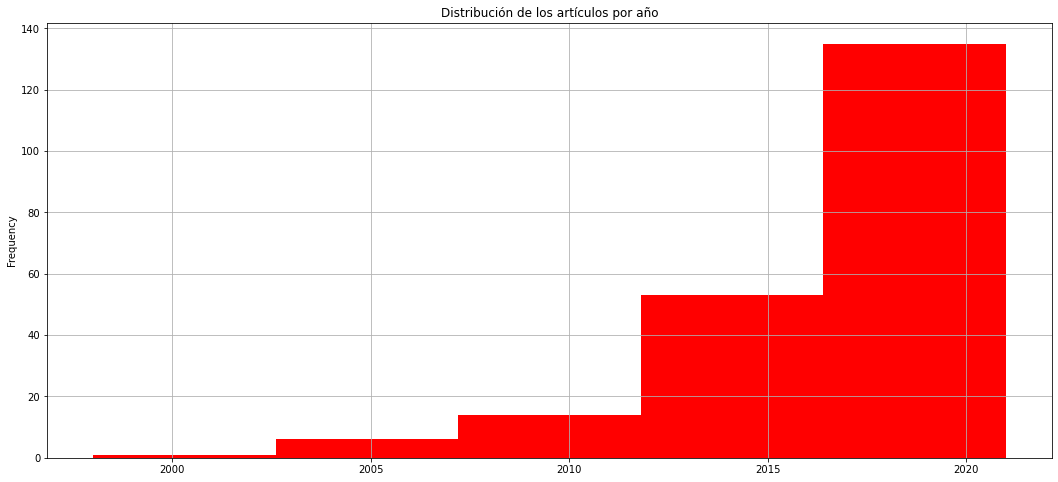

In [50]:
Revision_Bibliografica.Año.plot.hist(bins=5, color="r")
plt.grid(True)
plt.title("Distribución de los artículos por año")
plt.show()
#Gráfico correspondiente a la cantidad de artículos publicados entre 1998 y 2021

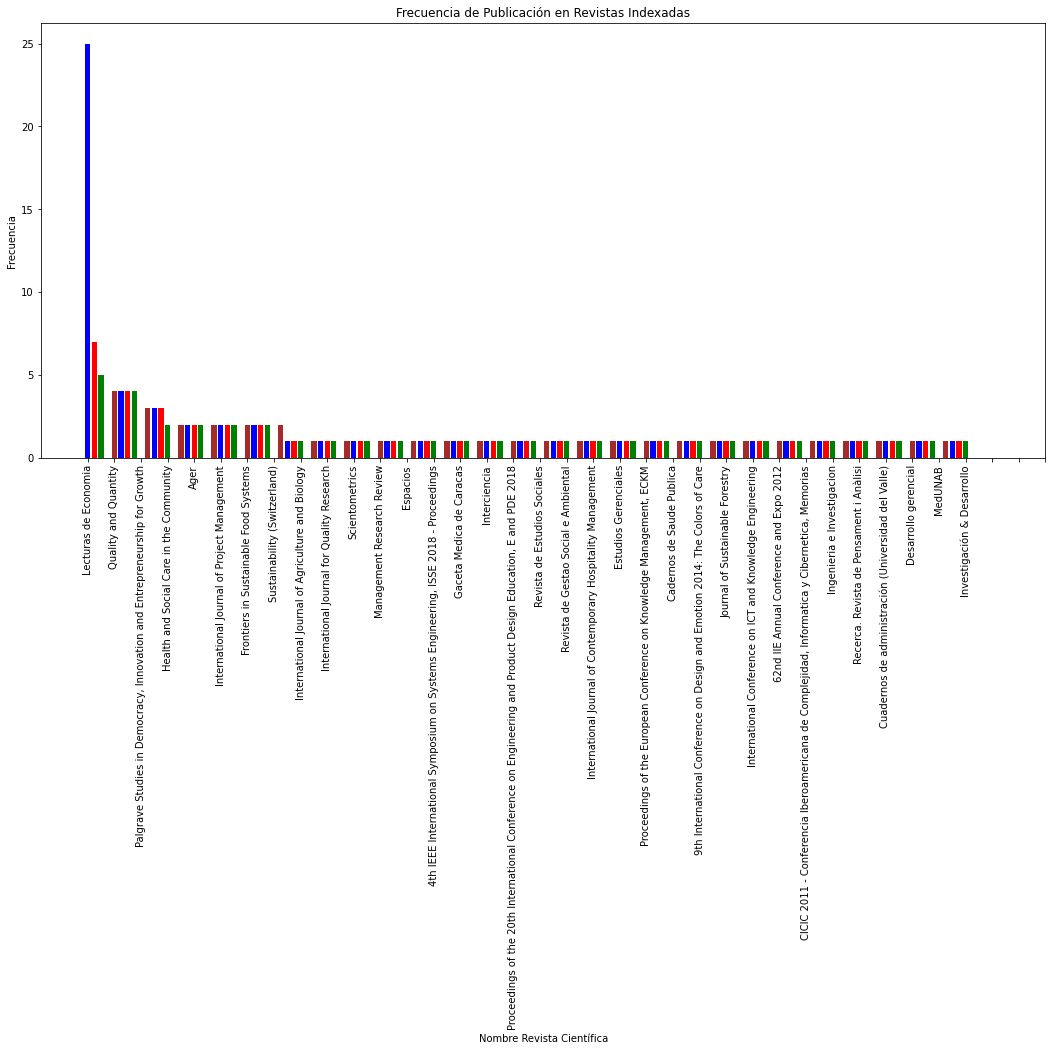

In [203]:
x_values = Revision_Bibliografica['Nombre Revista Científica'].unique()
y_values = Revision_Bibliografica['Nombre Revista Científica'].value_counts()
plt.bar(x_values, y_values, align='center', color=['blue','red','green','white','brown'], edgecolor='none')
plt.xticks(range(0,145,4),rotation = 90)
plt.title("Frecuencia de Publicación en Revistas Indexadas")
plt.xlabel("Nombre Revista Científica")
plt.ylabel("Frecuencia")
plt.show()

#Gráfico correspondiente a la frecuencia de publicación en revistas indexadas por nombre


In [51]:
import nltk #importo nltk para realizar el análisis de texto

In [52]:
Revision_Bibliografica['Resumen'] = Revision_Bibliografica['Resumen'].apply(lambda _: str(_)) #Esta función lambda me permite convertir la columna de Resumen en formato str, para evitar errores.

In [53]:
Revision_Bibliografica['Resumen'] #Compruebo 

0     The objective of this article was to evaluate ...
1     The main aim of this paper is to establish the...
2     Cooperatives with financial activity stimulate...
3     Achieving multi-million-hectare commitments fr...
4     It is widely recognized that the design and ap...
                            ...                        
15    This document aims to analize the influence of...
16    El objetivo fundamental de esta investigación ...
17    Un aspecto que permite reconocer el fomento a ...
18    ResumenFue aplicada la metodología del Radar d...
19    El objetivo del presente estudio es analizar l...
Name: Resumen, Length: 209, dtype: object

In [55]:
Texto = list(Revision_Bibliografica['Resumen']) #Convierto la columna a una lista, llamada Texto

In [57]:
Texto #Compruebo

['The objective of this article was to evaluate the trends of scientific production in Economics with Colombian institutional affiliation during the period 2007-2019. A bibliometric analysis was carried out from the information registered in Scopus, through indicators of production, citation and collaboration and the quantitative exploratory analysis method, using the Biblioshiny, Vantage Point and VOSviewer software. The behavior of authors, journals and topics of higher publication visibility such as innovation and economic growth were studied. The main trends in the scientific production of Colombian authors with the highest publication in Scopus, present an annual average growth rate of 13%, in addition to publications in prestigious journals and important networks of national and international collaboration and predominance of coauthored publications (index of 1.8), expanding the connection not only at the level of higher education institutions, but through research institutes. Th

In [58]:
list(Texto)

['The objective of this article was to evaluate the trends of scientific production in Economics with Colombian institutional affiliation during the period 2007-2019. A bibliometric analysis was carried out from the information registered in Scopus, through indicators of production, citation and collaboration and the quantitative exploratory analysis method, using the Biblioshiny, Vantage Point and VOSviewer software. The behavior of authors, journals and topics of higher publication visibility such as innovation and economic growth were studied. The main trends in the scientific production of Colombian authors with the highest publication in Scopus, present an annual average growth rate of 13%, in addition to publications in prestigious journals and important networks of national and international collaboration and predominance of coauthored publications (index of 1.8), expanding the connection not only at the level of higher education institutions, but through research institutes. Th

In [97]:
Texto_limpio = "".join(Texto) #Por medio de esta herramienta que me provee, hago un join de todos los elementos de la lista para que quede sólo un Texto

In [98]:
Texto_limpio #Compruebo

'The objective of this article was to evaluate the trends of scientific production in Economics with Colombian institutional affiliation during the period 2007-2019. A bibliometric analysis was carried out from the information registered in Scopus, through indicators of production, citation and collaboration and the quantitative exploratory analysis method, using the Biblioshiny, Vantage Point and VOSviewer software. The behavior of authors, journals and topics of higher publication visibility such as innovation and economic growth were studied. The main trends in the scientific production of Colombian authors with the highest publication in Scopus, present an annual average growth rate of 13%, in addition to publications in prestigious journals and important networks of national and international collaboration and predominance of coauthored publications (index of 1.8), expanding the connection not only at the level of higher education institutions, but through research institutes. The

In [76]:
Texto_limpio.split() #Separo todas las palabras con la función .split()

['The',
 'objective',
 'of',
 'this',
 'article',
 'was',
 'to',
 'evaluate',
 'the',
 'trends',
 'of',
 'scientific',
 'production',
 'in',
 'Economics',
 'with',
 'Colombian',
 'institutional',
 'affiliation',
 'during',
 'the',
 'period',
 '2007-2019.',
 'A',
 'bibliometric',
 'analysis',
 'was',
 'carried',
 'out',
 'from',
 'the',
 'information',
 'registered',
 'in',
 'Scopus,',
 'through',
 'indicators',
 'of',
 'production,',
 'citation',
 'and',
 'collaboration',
 'and',
 'the',
 'quantitative',
 'exploratory',
 'analysis',
 'method,',
 'using',
 'the',
 'Biblioshiny,',
 'Vantage',
 'Point',
 'and',
 'VOSviewer',
 'software.',
 'The',
 'behavior',
 'of',
 'authors,',
 'journals',
 'and',
 'topics',
 'of',
 'higher',
 'publication',
 'visibility',
 'such',
 'as',
 'innovation',
 'and',
 'economic',
 'growth',
 'were',
 'studied.',
 'The',
 'main',
 'trends',
 'in',
 'the',
 'scientific',
 'production',
 'of',
 'Colombian',
 'authors',
 'with',
 'the',
 'highest',
 'publication'

In [77]:
len(Texto_limpio.split()) #Cuento todas las palabras que hay en Texto_limpio

42911

In [79]:
nltk.download() #Descargo todas las herramientas que me provee nltk, esto se hace por una sóla vez, luego, ya queda guardado en nuestro disco.

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [93]:
from nltk import word_tokenize #Esta libreria de nltk, para convertir cada palabra del texto en un token

In [99]:
Texto_limpio = str(Texto_limpio) #Me aseguro de que el formato sea string

In [100]:
tokens = word_tokenize(Texto_limpio) 
print(type(tokens))
print(len(tokens))
print(tokens[:10])

<class 'list'>
48266
['The', 'objective', 'of', 'this', 'article', 'was', 'to', 'evaluate', 'the', 'trends']


In [101]:
text = nltk.Text(tokens)
print(type(tokens))
print(len(tokens))
print(tokens[:10])

<class 'list'>
48266
['The', 'objective', 'of', 'this', 'article', 'was', 'to', 'evaluate', 'the', 'trends']


In [104]:
text.concordance("innovation") #Hayo en el texto la palabra innovation en contexto

Displaying 25 of 411 matches:
er publication visibility such as innovation and economic growth were studied 
ll and Medium Enterprises ( SME ) innovation capabilities in Boyacá-Colombia .
naire of 58 items about different innovation management areas is distributed t
specific actions that can improve innovation culture . These actions are relat
 marketing strategies and product innovation . The innovation strategy has a s
gies and product innovation . The innovation strategy has a significant influe
t have a clear orientation to the innovation objectives in the marketing strat
rstanding sources and enablers of innovation . In addition , the findings show
ent . Investing in technology and innovation is recommended to meet current an
e components : seed selection and innovation , seed harvesting and production 
d robust science , technology and innovation ( STI ) policies and appropriate 
istry of science , technology and innovation ( MSTI ) and uses different time 
elevant research , tec

In [155]:
text.concordance("measurement")

Displaying 10 of 10 matches:
f the information rather than its measurement . © 2021 , Springer Science+Busin
ns . Firstly , the structural and measurement model was elaborated to account t
d the design of 92 indicators for measurement , distributed in each of the subs
n this way with reliable tools of measurement of the management of the CI SIDIG
tion , technological evaluation , measurement of intellectual capital , innovat
 article shows the results of the measurement of innovation capabilities in 460
ificant results observed were the measurement of the first five factors that sh
of Smart Grids that allow to make measurement of a process , local or remote co
 Grids , developing prototypes of measurement systems and communication drivers
0001 . This technology allows the measurement of energy efficiency on industria


In [107]:
text.concordance('management', lines=200)

Displaying 200 of 363 matches:
tributed with information for the management of the scientific activity and th
 items about different innovation management areas is distributed to 14 beekee
the determining attributes in the management of the cooperatives with financia
ependence and transparency of STI management by the new MSTI , which could gen
he National Network for Knowledge Management , Research , and Innovation in Tu
tive and contributes to knowledge management aimed at eliminating TB in Colomb
earch study an integrated quality management system is proposed for academic p
 high quality assurance , quality management , and excellence models in higher
tructure of an integrated quality management system while generating value for
SO 9001 standard provides process management , innovation , and knowledge mana
ment , innovation , and knowledge management . © 2021 . All Rights Reserved.Sc
 . This has generated a series of management and evaluation processes of unive
 strengthening the go

In [118]:
all_tokens = Texto_limpio.split()
all_tokens

['The',
 'objective',
 'of',
 'this',
 'article',
 'was',
 'to',
 'evaluate',
 'the',
 'trends',
 'of',
 'scientific',
 'production',
 'in',
 'Economics',
 'with',
 'Colombian',
 'institutional',
 'affiliation',
 'during',
 'the',
 'period',
 '2007-2019.',
 'A',
 'bibliometric',
 'analysis',
 'was',
 'carried',
 'out',
 'from',
 'the',
 'information',
 'registered',
 'in',
 'Scopus,',
 'through',
 'indicators',
 'of',
 'production,',
 'citation',
 'and',
 'collaboration',
 'and',
 'the',
 'quantitative',
 'exploratory',
 'analysis',
 'method,',
 'using',
 'the',
 'Biblioshiny,',
 'Vantage',
 'Point',
 'and',
 'VOSviewer',
 'software.',
 'The',
 'behavior',
 'of',
 'authors,',
 'journals',
 'and',
 'topics',
 'of',
 'higher',
 'publication',
 'visibility',
 'such',
 'as',
 'innovation',
 'and',
 'economic',
 'growth',
 'were',
 'studied.',
 'The',
 'main',
 'trends',
 'in',
 'the',
 'scientific',
 'production',
 'of',
 'Colombian',
 'authors',
 'with',
 'the',
 'highest',
 'publication'

In [119]:
alpha = [w for w in all_tokens if w.isalpha()]
alpha

['The',
 'objective',
 'of',
 'this',
 'article',
 'was',
 'to',
 'evaluate',
 'the',
 'trends',
 'of',
 'scientific',
 'production',
 'in',
 'Economics',
 'with',
 'Colombian',
 'institutional',
 'affiliation',
 'during',
 'the',
 'period',
 'A',
 'bibliometric',
 'analysis',
 'was',
 'carried',
 'out',
 'from',
 'the',
 'information',
 'registered',
 'in',
 'through',
 'indicators',
 'of',
 'citation',
 'and',
 'collaboration',
 'and',
 'the',
 'quantitative',
 'exploratory',
 'analysis',
 'using',
 'the',
 'Vantage',
 'Point',
 'and',
 'VOSviewer',
 'The',
 'behavior',
 'of',
 'journals',
 'and',
 'topics',
 'of',
 'higher',
 'publication',
 'visibility',
 'such',
 'as',
 'innovation',
 'and',
 'economic',
 'growth',
 'were',
 'The',
 'main',
 'trends',
 'in',
 'the',
 'scientific',
 'production',
 'of',
 'Colombian',
 'authors',
 'with',
 'the',
 'highest',
 'publication',
 'in',
 'present',
 'an',
 'annual',
 'average',
 'growth',
 'rate',
 'of',
 'in',
 'addition',
 'to',
 'publi

In [125]:
freqdist = nltk.FreqDist(alpha)
freqdist

FreqDist({'the': 2945, 'of': 2127, 'and': 1772, 'in': 1122, 'to': 948, 'a': 700, 'that': 420, 'is': 405, 'for': 368, 'The': 331, ...})

In [126]:
def no_punct(text):
    '''
    Elimina signos de puntuación y otros caracteres indeseados
    '''
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´]+', '', text)

In [127]:
tokens_no_punc = list(map(no_punct, all_tokens))
tokens_no_punc

['The',
 'objective',
 'of',
 'this',
 'article',
 'was',
 'to',
 'evaluate',
 'the',
 'trends',
 'of',
 'scientific',
 'production',
 'in',
 'Economics',
 'with',
 'Colombian',
 'institutional',
 'affiliation',
 'during',
 'the',
 'period',
 '20072019',
 'A',
 'bibliometric',
 'analysis',
 'was',
 'carried',
 'out',
 'from',
 'the',
 'information',
 'registered',
 'in',
 'Scopus',
 'through',
 'indicators',
 'of',
 'production',
 'citation',
 'and',
 'collaboration',
 'and',
 'the',
 'quantitative',
 'exploratory',
 'analysis',
 'method',
 'using',
 'the',
 'Biblioshiny',
 'Vantage',
 'Point',
 'and',
 'VOSviewer',
 'software',
 'The',
 'behavior',
 'of',
 'authors',
 'journals',
 'and',
 'topics',
 'of',
 'higher',
 'publication',
 'visibility',
 'such',
 'as',
 'innovation',
 'and',
 'economic',
 'growth',
 'were',
 'studied',
 'The',
 'main',
 'trends',
 'in',
 'the',
 'scientific',
 'production',
 'of',
 'Colombian',
 'authors',
 'with',
 'the',
 'highest',
 'publication',
 'in',


In [128]:
lower = [w.lower() for w in tokens_no_punc]
lower

['the',
 'objective',
 'of',
 'this',
 'article',
 'was',
 'to',
 'evaluate',
 'the',
 'trends',
 'of',
 'scientific',
 'production',
 'in',
 'economics',
 'with',
 'colombian',
 'institutional',
 'affiliation',
 'during',
 'the',
 'period',
 '20072019',
 'a',
 'bibliometric',
 'analysis',
 'was',
 'carried',
 'out',
 'from',
 'the',
 'information',
 'registered',
 'in',
 'scopus',
 'through',
 'indicators',
 'of',
 'production',
 'citation',
 'and',
 'collaboration',
 'and',
 'the',
 'quantitative',
 'exploratory',
 'analysis',
 'method',
 'using',
 'the',
 'biblioshiny',
 'vantage',
 'point',
 'and',
 'vosviewer',
 'software',
 'the',
 'behavior',
 'of',
 'authors',
 'journals',
 'and',
 'topics',
 'of',
 'higher',
 'publication',
 'visibility',
 'such',
 'as',
 'innovation',
 'and',
 'economic',
 'growth',
 'were',
 'studied',
 'the',
 'main',
 'trends',
 'in',
 'the',
 'scientific',
 'production',
 'of',
 'colombian',
 'authors',
 'with',
 'the',
 'highest',
 'publication',
 'in',


In [133]:
alpha = [w for w in lower if not w.isdigit()]
alpha

['the',
 'objective',
 'of',
 'this',
 'article',
 'was',
 'to',
 'evaluate',
 'the',
 'trends',
 'of',
 'scientific',
 'production',
 'in',
 'economics',
 'with',
 'colombian',
 'institutional',
 'affiliation',
 'during',
 'the',
 'period',
 'a',
 'bibliometric',
 'analysis',
 'was',
 'carried',
 'out',
 'from',
 'the',
 'information',
 'registered',
 'in',
 'scopus',
 'through',
 'indicators',
 'of',
 'production',
 'citation',
 'and',
 'collaboration',
 'and',
 'the',
 'quantitative',
 'exploratory',
 'analysis',
 'method',
 'using',
 'the',
 'biblioshiny',
 'vantage',
 'point',
 'and',
 'vosviewer',
 'software',
 'the',
 'behavior',
 'of',
 'authors',
 'journals',
 'and',
 'topics',
 'of',
 'higher',
 'publication',
 'visibility',
 'such',
 'as',
 'innovation',
 'and',
 'economic',
 'growth',
 'were',
 'studied',
 'the',
 'main',
 'trends',
 'in',
 'the',
 'scientific',
 'production',
 'of',
 'colombian',
 'authors',
 'with',
 'the',
 'highest',
 'publication',
 'in',
 'scopus',
 '

In [134]:
from nltk.corpus import stopwords
#Grab stopwords in English
stopwords_eng = stopwords.words('english')
stopwords_eng

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [135]:
tokens_no_stop = [w for w in alpha if w not in stopwords_eng]
tokens_no_stop

['objective',
 'article',
 'evaluate',
 'trends',
 'scientific',
 'production',
 'economics',
 'colombian',
 'institutional',
 'affiliation',
 'period',
 'bibliometric',
 'analysis',
 'carried',
 'information',
 'registered',
 'scopus',
 'indicators',
 'production',
 'citation',
 'collaboration',
 'quantitative',
 'exploratory',
 'analysis',
 'method',
 'using',
 'biblioshiny',
 'vantage',
 'point',
 'vosviewer',
 'software',
 'behavior',
 'authors',
 'journals',
 'topics',
 'higher',
 'publication',
 'visibility',
 'innovation',
 'economic',
 'growth',
 'studied',
 'main',
 'trends',
 'scientific',
 'production',
 'colombian',
 'authors',
 'highest',
 'publication',
 'scopus',
 'present',
 'annual',
 'average',
 'growth',
 'rate',
 'addition',
 'publications',
 'prestigious',
 'journals',
 'important',
 'networks',
 'national',
 'international',
 'collaboration',
 'predominance',
 'coauthored',
 'publications',
 'index',
 'expanding',
 'connection',
 'level',
 'higher',
 'education',


In [136]:
freqdist = nltk.FreqDist(tokens_no_stop)
freqdist.most_common()


[('innovation', 409),
 ('management', 360),
 ('de', 269),
 ('colombia', 244),
 ('research', 202),
 ('knowledge', 198),
 ('development', 163),
 ('©', 160),
 ('results', 144),
 ('model', 134),
 ('study', 131),
 ('processes', 118),
 ('social', 117),
 ('la', 111),
 ('technology', 109),
 ('', 107),
 ('companies', 105),
 ('organizational', 105),
 ('sector', 100),
 ('based', 98),
 ('information', 92),
 ('analysis', 86),
 ('technological', 85),
 ('new', 83),
 ('en', 83),
 ('process', 79),
 ('paper', 73),
 ('design', 69),
 ('system', 69),
 ('el', 69),
 ('education', 65),
 ('colombian', 64),
 ('capabilities', 62),
 ('strategy', 61),
 ('quality', 60),
 ('organizations', 59),
 ('business', 59),
 ('methodology', 56),
 ('systems', 56),
 ('national', 54),
 ('rights', 54),
 ('use', 54),
 ('institutions', 53),
 ('different', 53),
 ('factors', 53),
 ('project', 52),
 ('also', 51),
 ('performance', 51),
 ('article', 50),
 ('university', 50),
 ('strategies', 49),
 ('health', 49),
 ('services', 49),
 ('inn

In [151]:
not_of_interest = ['©', '', 'new', 'en', 'el', 'also', 'del', 'used', 'using', 'las', 'the', 'of', 'was', 'to', 'of', 'in', 'with', 'this', 'a', 'out', 'from', 'scopus', 'and', 'such', 'as', 'were', 'an', 'not', 'only', 'at', 'but', 'through', 'for', 'de', 'go', 'sti', 'or', 'notion', 'that', 'these' ]

In [164]:
tokens_of_interest = [w for w in alpha if w not in not_of_interest]
tokens_of_interest
dict(tokens_of_interest)

ValueError: dictionary update sequence element #0 has length 9; 2 is required

In [153]:
tokens_nltk = nltk.Text(tokens_of_interest)
tokens_nltk

<Text: objective article evaluate trends scientific production economics colombian...>

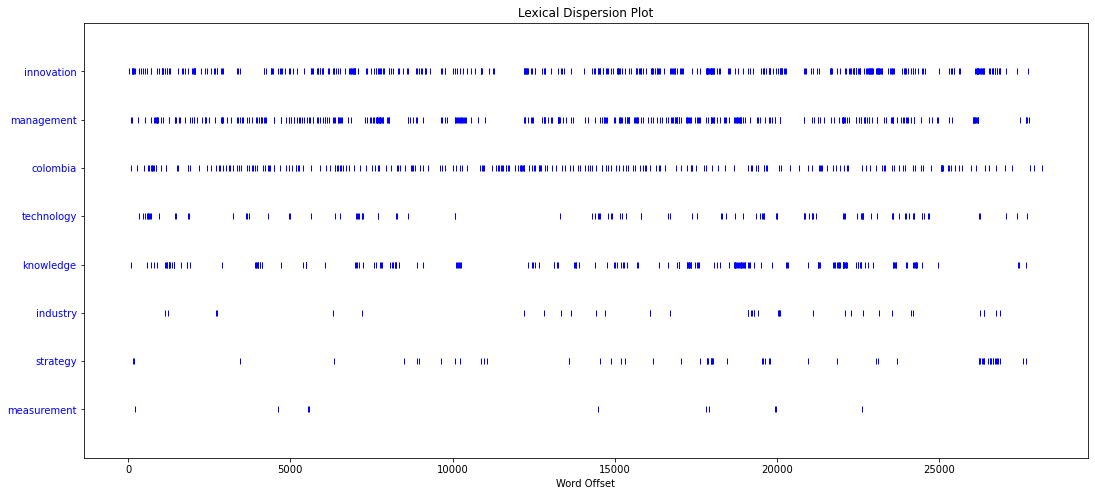

In [167]:
tokens_nltk.dispersion_plot(['innovation', 'management', 'colombia', 'technology', 'knowledge', 'industry', 'strategy', 'measurement']) #Creo un diagrama de dispersión